# this code have been written by 

* **[Ahmad Almouse](https://www.linkedin.com/in/ahmadalmousa2000)**
* **[Maha Ismail](https://www.linkedin.com/in/maha-ismail-35a553213)**
* **[Shaker Abu Rassa'](https://www.linkedin.com/in/shaker-abu-rassa)**

project presentation [slides](https://www.canva.com/design/DAFcLA_uZsk/TM_dyLG8LRTAhjv2w0RZWw/view?utm_content=DAFcLA_uZsk&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink)

# import the needed libraries 

In [440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # import train_test_split function 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')


# reading the data 

In [441]:
df=pd.read_csv('food_prices_jor.csv')
df2023=pd.read_csv('2023.csv')
population_df=pd.read_csv("Population in Jordan.csv")
deaths_df=pd.read_excel('number of war deaths.xlsx')
jordan_covid_df=pd.read_csv('jordan-covid-data.csv').fillna(0)
world_covid_df=pd.read_csv('world-covid-data.csv').fillna(0)

## the data 

In [442]:
df.head(20)

,date,market,category,commodity,unit,price,H-date
0,1/15/2011,National Average,cereals and tubers,Bread (pita),KG,0.16,10/02/1432
1,1/15/2011,National Average,cereals and tubers,Rice (imported),KG,0.90,11/02/1432
2,1/15/2011,National Average,oil and fats,Oil (vegetable),1.8 L,1.50,12/02/1432
3,1/15/2011,National Average,pulses and nuts,Pulses,KG,1.20,13/02/1432
4,2/15/2011,National Average,cereals and tubers,Bread (pita),KG,0.16,14/02/1432
5,2/15/2011,National Average,cereals and tubers,Rice (imported),KG,1.07,15/02/1432
6,2/15/2011,National Average,oil and fats,Oil (vegetable),1.8 L,1.60,16/02/1432
7,2/15/2011,National Average,pulses and nuts,Pulses,KG,1.27,17/02/1432
8,3/15/2011,National Average,cereals and tubers,Bread (pita),KG,0.16,10/04/1432
9,3/15/2011,National Average,cereals and tubers,Rice (imported),KG,1.04,10/04/1432


In [443]:
population_df

,Year,population,annual_change
0,2011,7109980,0.00
1,2012,7211863,1.43
2,2013,7694814,6.70
3,2014,8658026,12.52
4,2015,9494246,9.66
5,2016,9964656,4.95
6,2017,10215381,2.25
7,2018,10459865,2.39
8,2019,10698683,2.28
9,2020,10928721,2.15


In [444]:
deaths_df

,Year,middle_east,world
0,2011,4101,25216
1,2012,54501,74065
2,2013,73836,92797
3,2014,81125,112722
4,2015,69396,102369
5,2016,56775,87300
6,2017,35347,67885
7,2018,20378,54914
8,2019,10790,51244
9,2020,8806,49304


In [445]:
jordan_covid_df.head()

,iso_code,continent,location,date,jor_new_cases,jor_new_deaths
0,JOR,Asia,Jordan,3/3/2020,1.0,0.0
1,JOR,Asia,Jordan,3/4/2020,0.0,0.0
2,JOR,Asia,Jordan,3/5/2020,0.0,0.0
3,JOR,Asia,Jordan,3/6/2020,0.0,0.0
4,JOR,Asia,Jordan,3/7/2020,0.0,0.0


In [446]:
world_covid_df.head()

,iso_code,continent,location,date,world_new_cases,world_new_deaths
0,AFG,Asia,Afghanistan,2/24/2020,5.0,0.0
1,AFG,Asia,Afghanistan,2/25/2020,0.0,0.0
2,AFG,Asia,Afghanistan,2/26/2020,0.0,0.0
3,AFG,Asia,Afghanistan,2/27/2020,0.0,0.0
4,AFG,Asia,Afghanistan,2/28/2020,0.0,0.0


# data prep


## df

In [447]:
df.drop_duplicates(inplace=True) # droping the duplicates if there is any


df['date'] = pd.to_datetime(df['date']).dt.to_period('M') # to make new columns year , month

df=df.groupby(['H-date','date','category','commodity'])['price'].mean().reset_index()
df.sort_values(by=['date','category','commodity'],inplace=True)
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year 

df = df.loc[df.year > 2011 ] # filltering the data

# df['H-month']=df['H-date'].apply(lambda x :int(x.split(sep='/')[1]))  # to make new columns hijri month
# df['H-year']=df['H-date'].apply(lambda x :int(x.split(sep='/')[2]))  # to make new columns hijri month

def is_ramadan(x):
    if int(x.split(sep='/')[1]) in [8,9,10]:
        return 1
    else : 
        return 0
df['is_ramdan']=df['H-date'].apply(is_ramadan) # to make new columns with true false values (true when hijri months is equal to 8,9,10)

df.drop(['H-date','date'],axis=1,inplace=True) # droping the un needed columns 


In [448]:
df.tail(10)

,category,commodity,price,month,year,is_ramdan
2011,pulses and nuts,Chickpeas,1.883333,12,2022,0
2012,pulses and nuts,Lentils,1.286667,12,2022,0
2013,vegetables and fruits,Apples (red),1.335000,12,2022,0
2014,vegetables and fruits,Bananas,0.864545,12,2022,0
2015,vegetables and fruits,Cucumbers,0.471667,12,2022,0
2016,vegetables and fruits,Garlic,2.556667,12,2022,0
2017,vegetables and fruits,Onions,0.623333,12,2022,0
2018,vegetables and fruits,Oranges (big size),1.360000,12,2022,0
2019,vegetables and fruits,Spinach,0.431667,12,2022,0
2020,vegetables and fruits,Tomatoes,0.378333,12,2022,0


## df2023 prep

In [449]:
df2023['date'] = pd.to_datetime(df2023['date']).dt.to_period('M') # to make new columns year , month

df2023=df2023.groupby(['date','category','commodity'])['price'].mean().reset_index()
df2023.sort_values(by=['date','category','commodity'],inplace=True)
df2023['month'] = df2023['date'].dt.month
df2023['year'] = df2023['date'].dt.year 

df2023 = df2023[df2023['date'] == '1/15/2023']


df2023.drop(['date'],axis=1,inplace=True)
df2023['is_ramdan'] = [0 for index, row in df2023.iterrows()]
df2023['population'] = [11110936 for index, row in df2023.iterrows()]
df2023['middle_east'] = [3330 for index, row in df2023.iterrows()]
df2023['world'] = [14066 for index, row in df2023.iterrows()]
# df2023['jor_new_cases'] = [0 for index, row in df2023.iterrows()]
# df2023['jor_new_deaths'] = [0 for index, row in df2023.iterrows()]

df2023.insert(len(df2023.columns)-1, 'price', df2023.pop('price'))


df2023.head()


,category,commodity,month,year,is_ramdan,population,middle_east,world,price
3812,cereals and tubers,Bread (pita),1,2023,0,11110936,3330,14066,0.324167
3813,cereals and tubers,Bulgur,1,2023,0,11110936,3330,14066,0.912500
3814,cereals and tubers,Pasta,1,2023,0,11110936,3330,14066,0.367500
3815,cereals and tubers,Potatoes,1,2023,0,11110936,3330,14066,0.598333
3816,cereals and tubers,Rice (imported),1,2023,0,11110936,3330,14066,1.335000


In [450]:
df2023.head()

,category,commodity,month,year,is_ramdan,population,middle_east,world,price
3812,cereals and tubers,Bread (pita),1,2023,0,11110936,3330,14066,0.324167
3813,cereals and tubers,Bulgur,1,2023,0,11110936,3330,14066,0.912500
3814,cereals and tubers,Pasta,1,2023,0,11110936,3330,14066,0.367500
3815,cereals and tubers,Potatoes,1,2023,0,11110936,3330,14066,0.598333
3816,cereals and tubers,Rice (imported),1,2023,0,11110936,3330,14066,1.335000


## war deaths data prep and population_df prep

In [451]:
di = {}
middle_east = {}
world = {}
for i in range(population_df.shape[0]-1):
    di[df['year'].unique()[i]] = np.linspace(population_df['population'][i],population_df['population'][i+1],12)
    middle_east[df['year'].unique()[i]] = np.full((12,),deaths_df['middle_east'][i]//12)
    world[df['year'].unique()[i]] = np.full((12,),deaths_df['world'][i]//12)
df['population'] = [int(di[row['year']][row['month']-1]) for index, row in df.iterrows()]
df['middle_east'] = [int(middle_east[row['year']][row['month']-1]) for index, row in df.iterrows()]
df['world'] = [int(world[row['year']][row['month']-1]) for index, row in df.iterrows()]

## corona data prep

### jordan

In [452]:
jordan_covid_df['date'] = pd.to_datetime(jordan_covid_df['date'], format='%m/%d/%Y').dt.to_period('M')

jordan_covid_df['month'] = jordan_covid_df['date'].dt.month
jordan_covid_df['year'] = jordan_covid_df['date'].dt.year 

jordan_covid_df.drop(columns=['iso_code','continent','location','date'],axis=1,inplace=True) # drop the unneeded columns

jordan_covid_df=jordan_covid_df.groupby(by=['year','month']).sum().reset_index()
jordan_covid_df.sort_values(by=['year','month'],inplace=True)

In [453]:
jordan_covid_df.head()

,year,month,jor_new_cases,jor_new_deaths
0,2020,3,274.0,5.0
1,2020,4,179.0,3.0
2,2020,5,286.0,1.0
3,2020,6,393.0,0.0
4,2020,7,171.0,2.0


### world wide

In [454]:
world_covid_df['date'] = pd.to_datetime(world_covid_df['date'], format='%m/%d/%Y').dt.to_period('M')

world_covid_df['month'] = world_covid_df['date'].dt.month
world_covid_df['year'] = world_covid_df['date'].dt.year 

world_covid_df.drop(columns=['iso_code','continent','location','date'],axis=1,inplace=True) # drop the unneeded columns

world_covid_df=world_covid_df.groupby(by=['year','month']).sum().reset_index()
world_covid_df.sort_values(by=['year','month'],inplace=True)

In [455]:
world_covid_df.head()

,year,month,world_new_cases,world_new_deaths
0,2020,1,37493.0,788.0
1,2020,2,304360.0,10947.0
2,2020,3,3519291.0,204969.0
3,2020,4,10416385.0,897225.0
4,2020,5,11795981.0,644301.0


## joining all data frames

In [456]:
# df=df.merge(jordan_covid_df,on=['year','month'],how='left').fillna(0)
# df=df.merge(world_covid_df,on=['year','month'],how='left').fillna(0)


In [457]:
df.insert(len(df.columns)-1, 'price', df.pop('price'))


In [458]:
df.tail(5)

,category,commodity,month,year,is_ramdan,population,middle_east,world,price
2016,vegetables and fruits,Garlic,12,2022,0,11285869,3330,14066,2.556667
2017,vegetables and fruits,Onions,12,2022,0,11285869,3330,14066,0.623333
2018,vegetables and fruits,Oranges (big size),12,2022,0,11285869,3330,14066,1.360000
2019,vegetables and fruits,Spinach,12,2022,0,11285869,3330,14066,0.431667
2020,vegetables and fruits,Tomatoes,12,2022,0,11285869,3330,14066,0.378333


# data cor

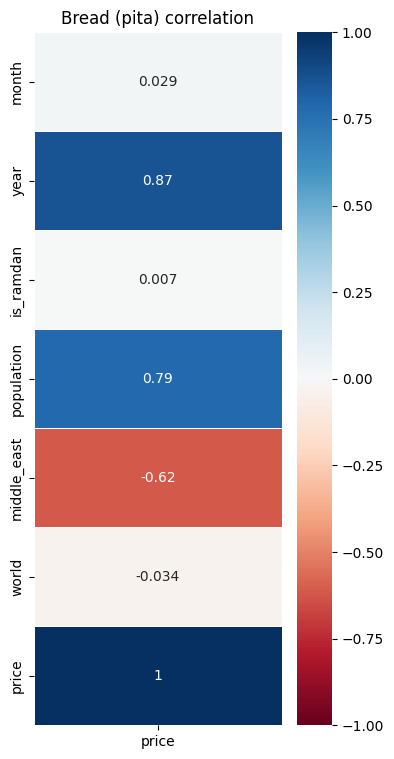

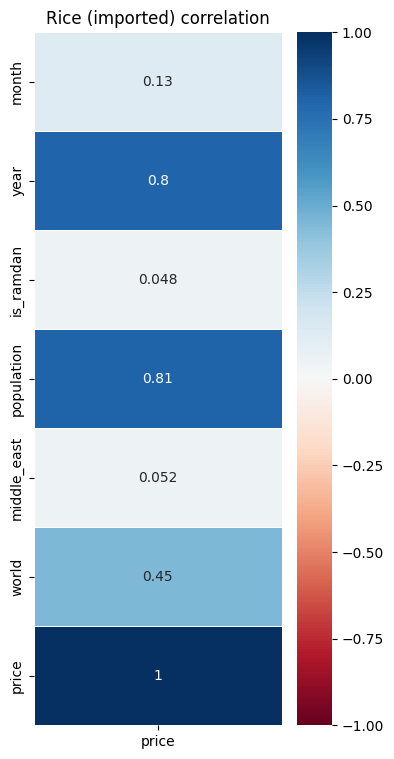

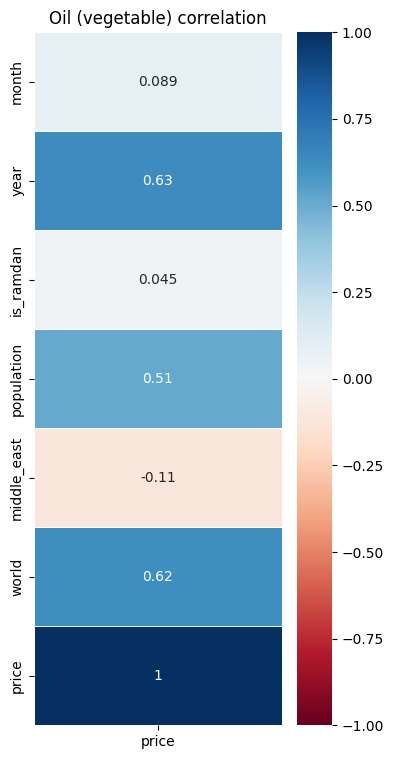

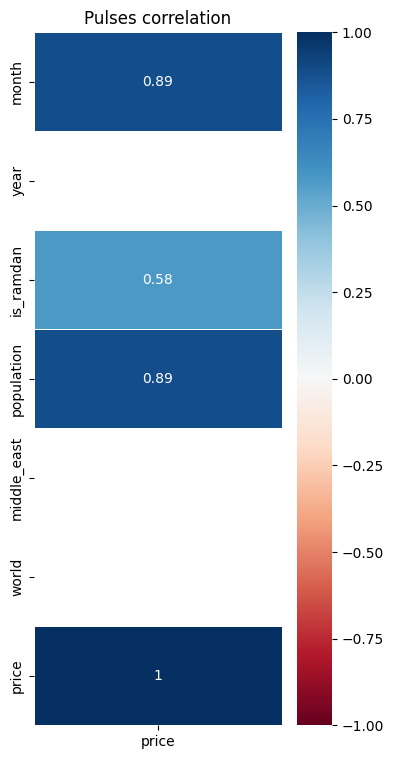

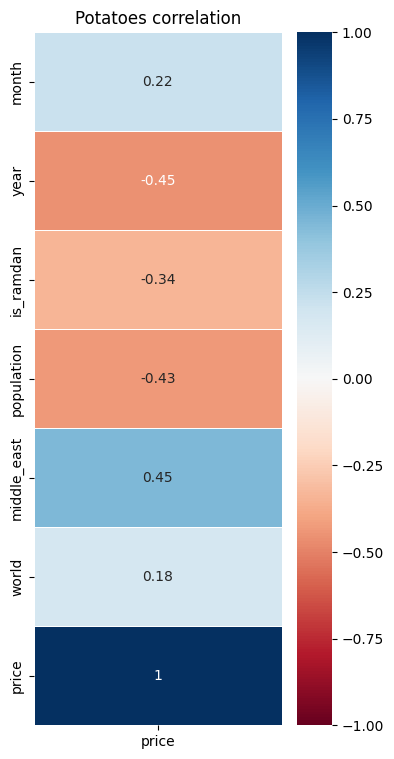

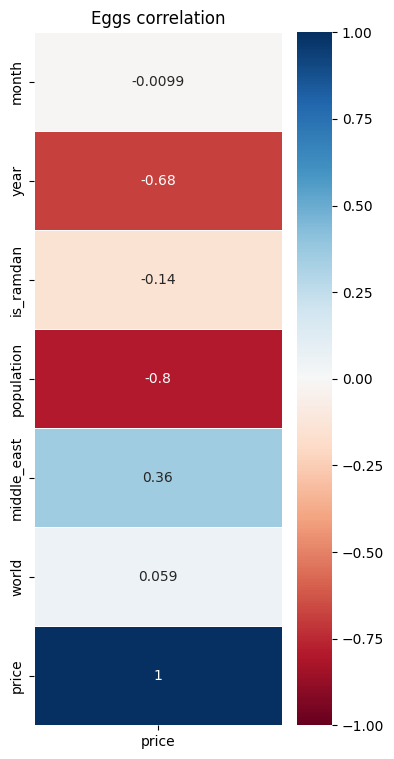

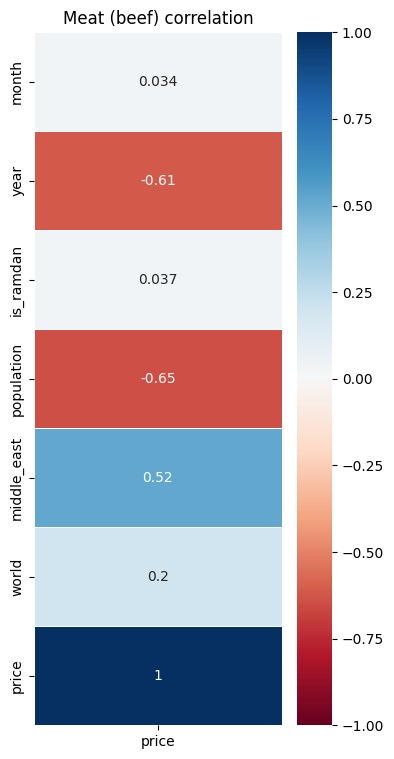

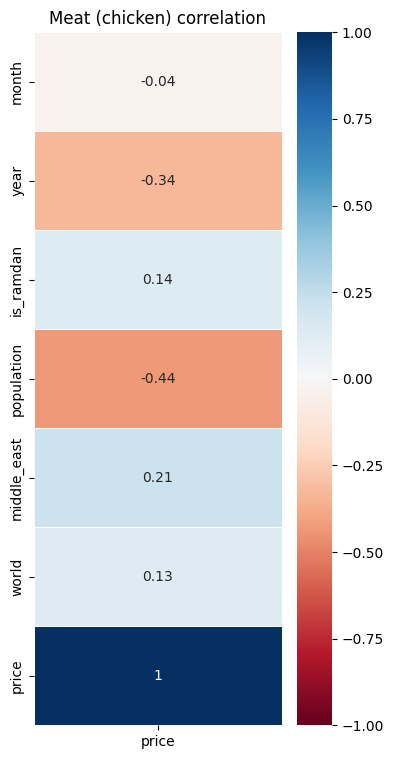

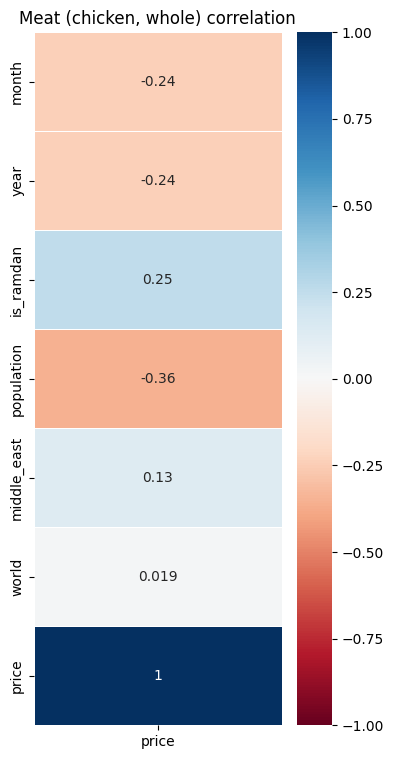

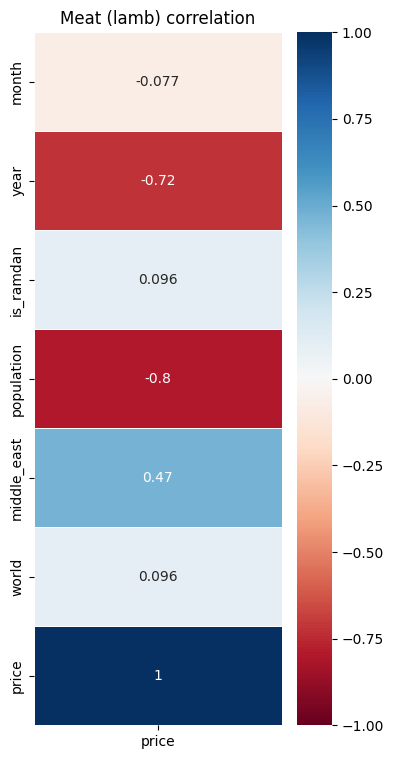

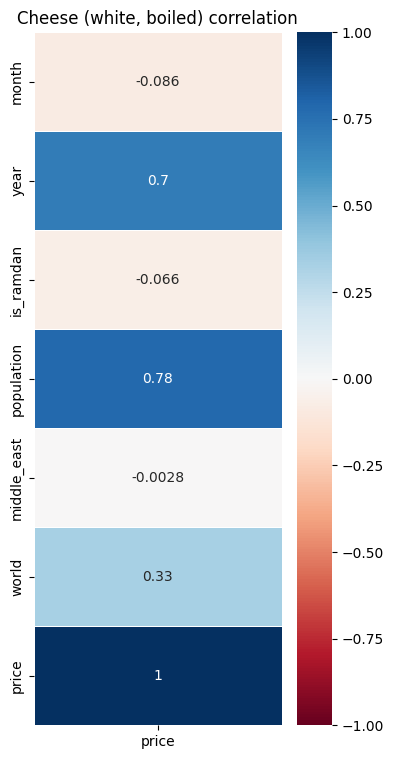

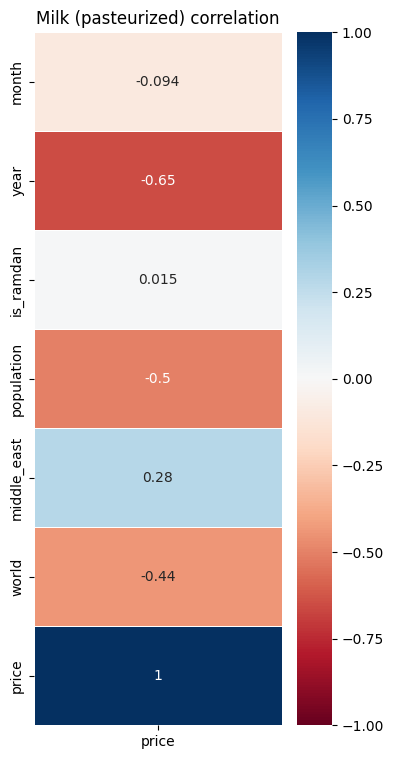

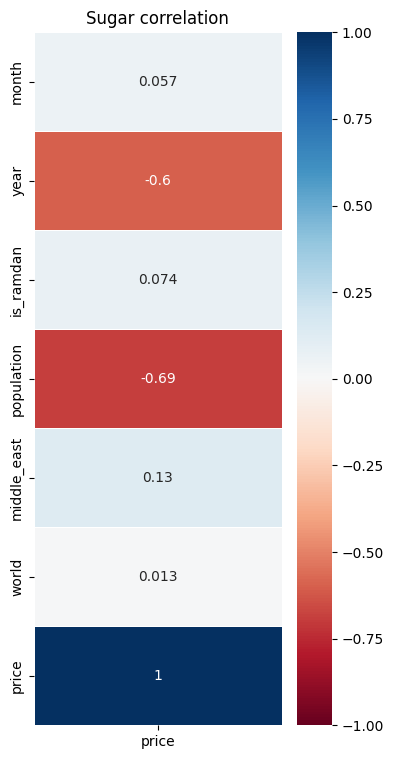

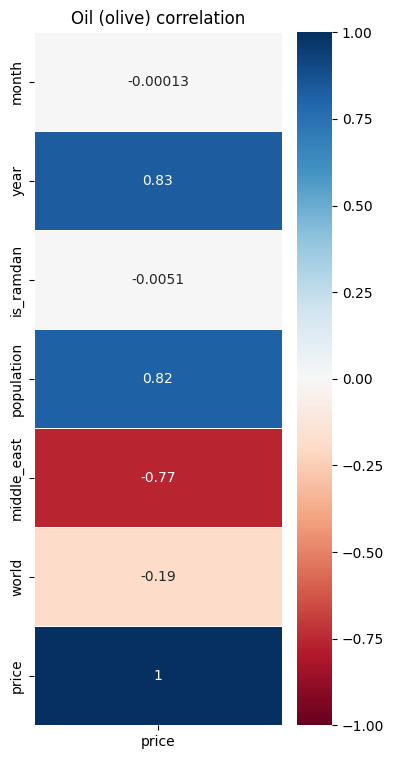

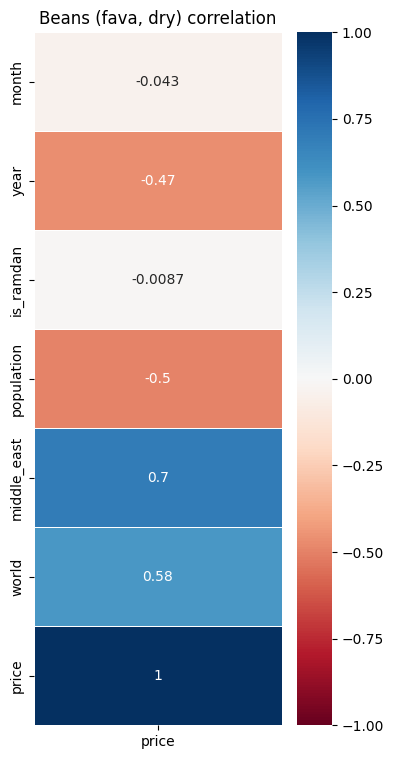

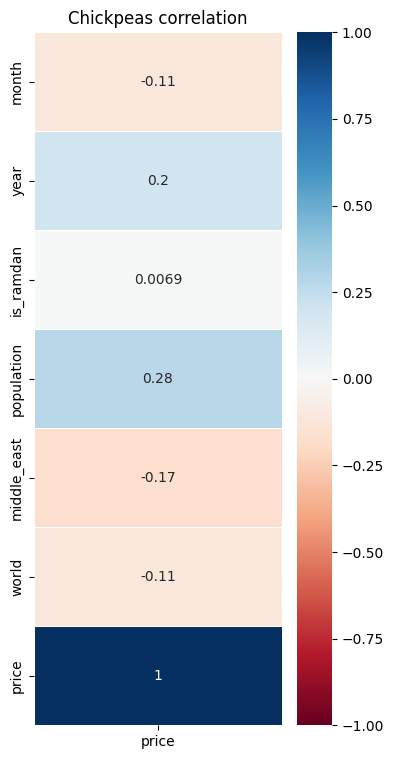

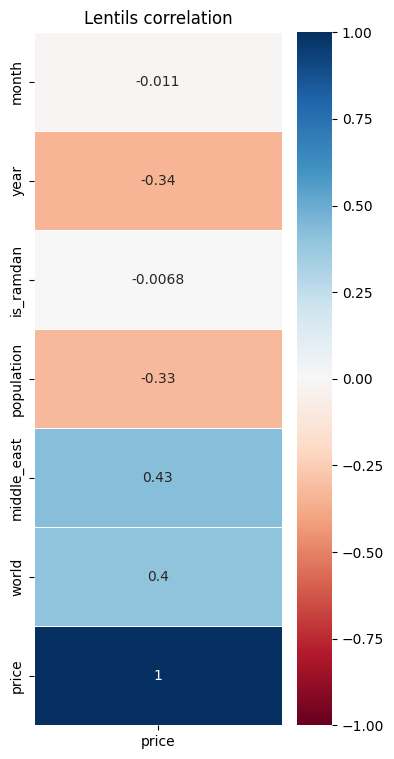

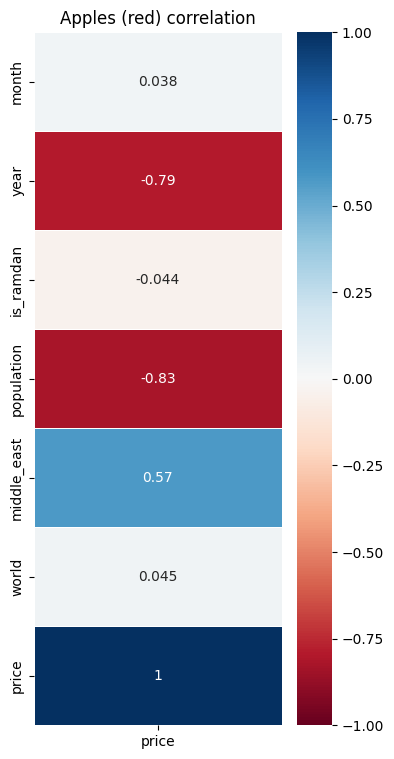

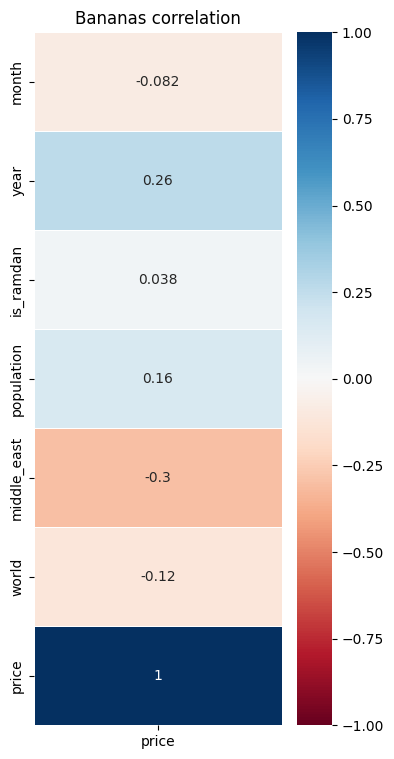

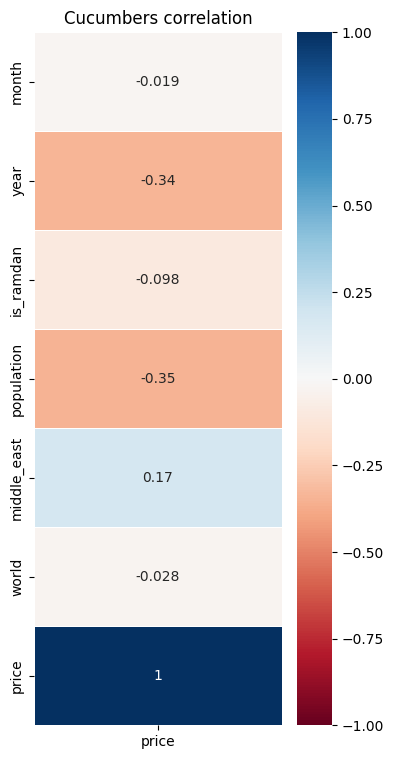

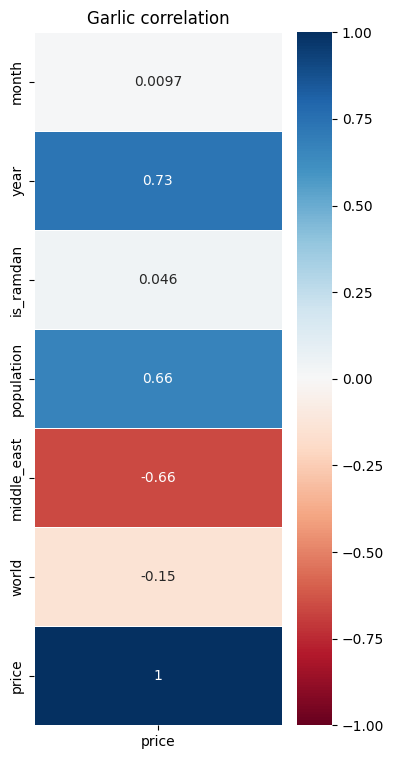

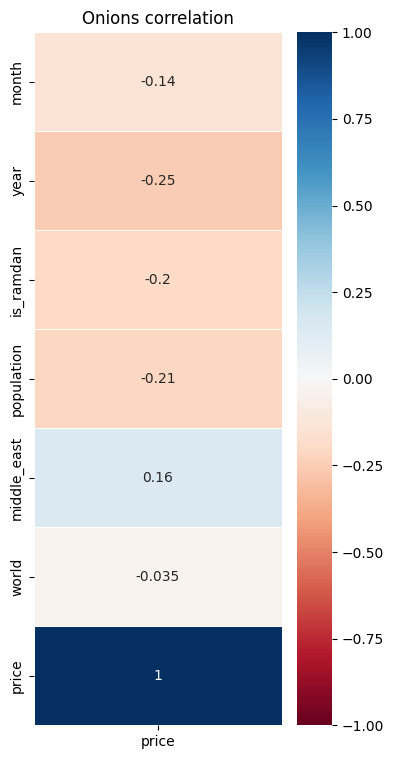

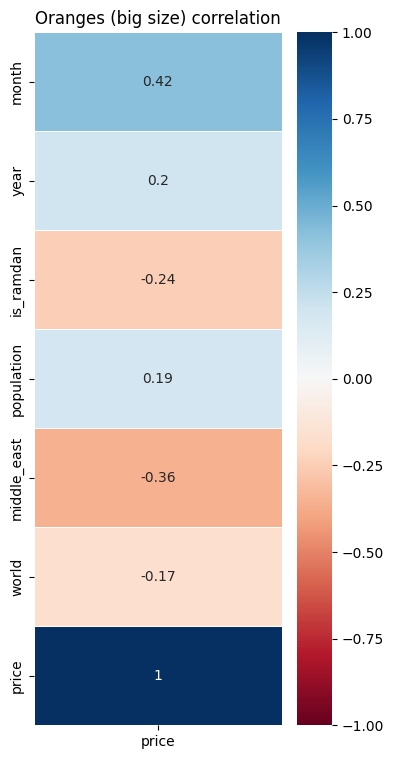

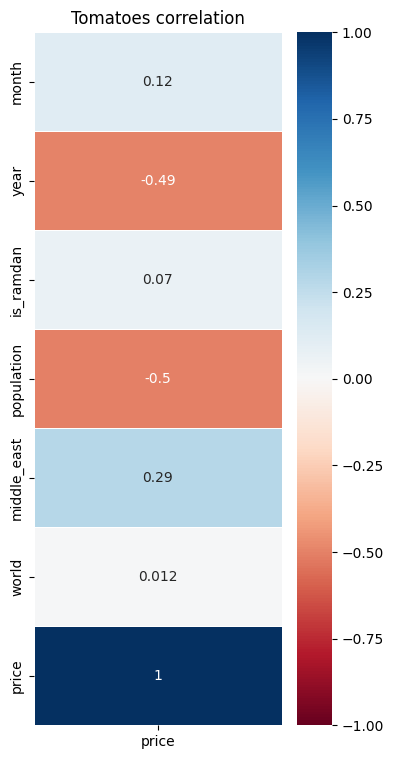

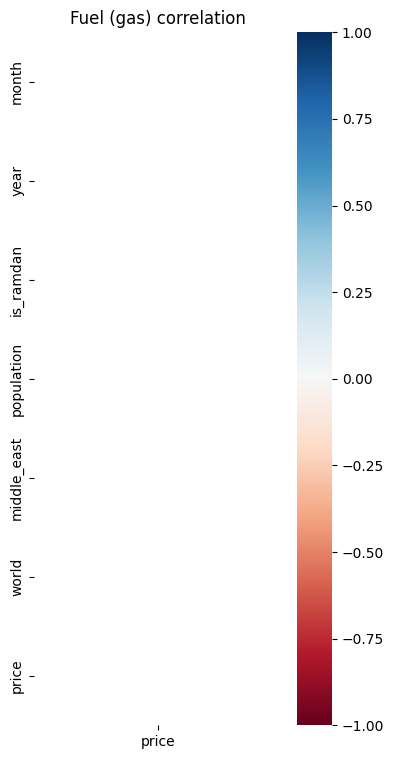

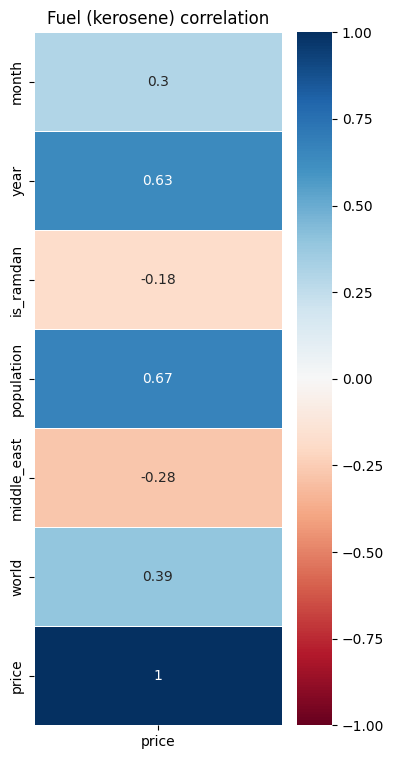

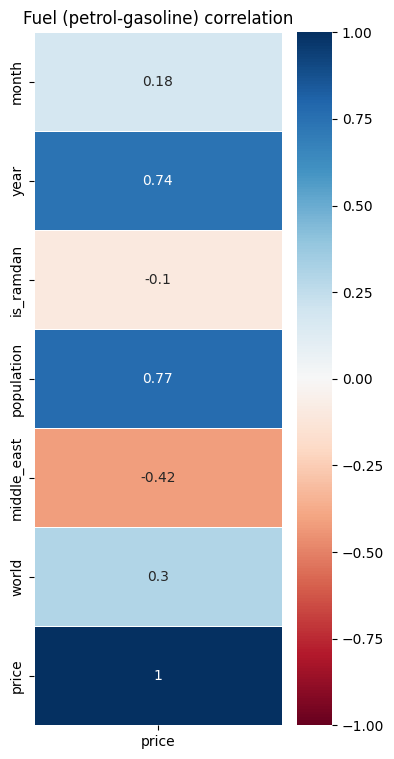

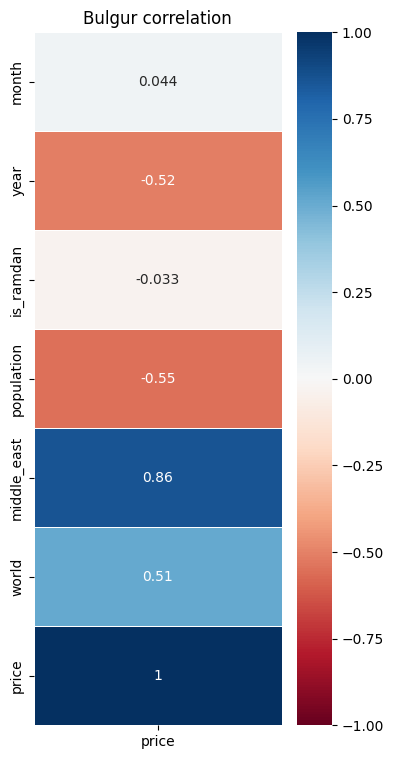

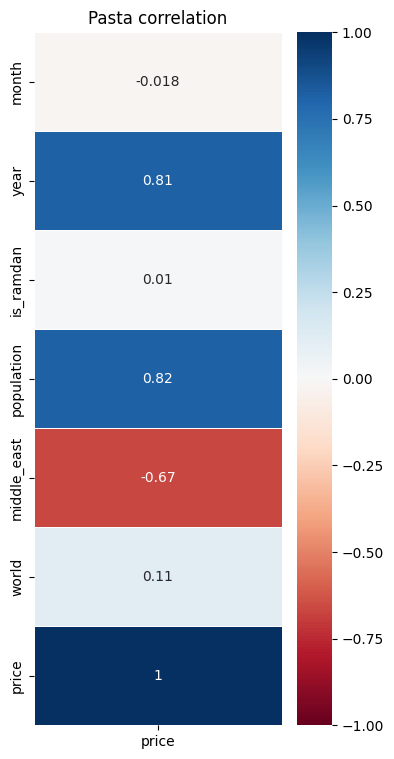

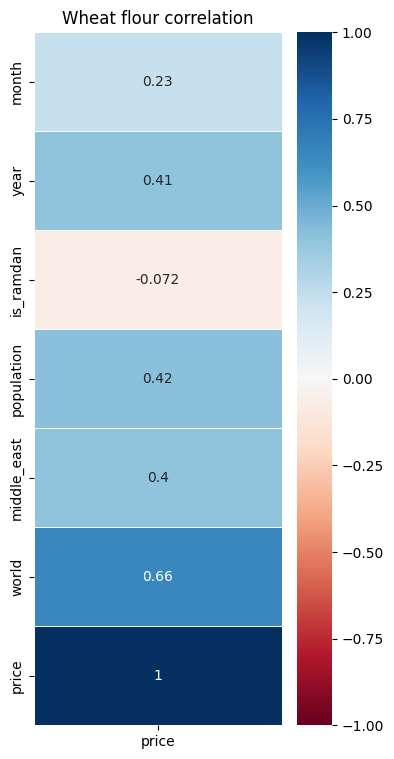

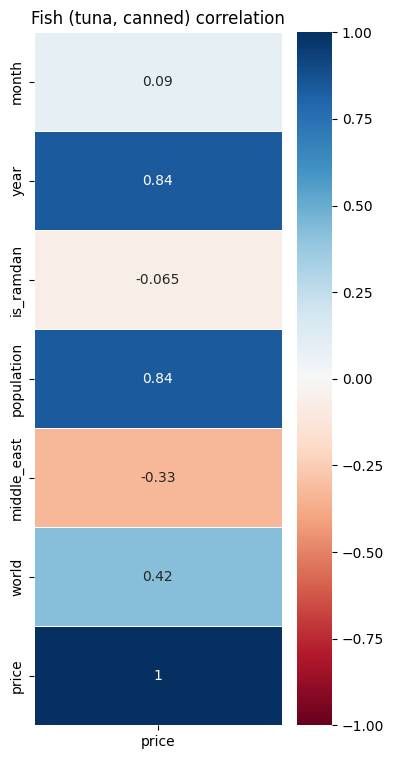

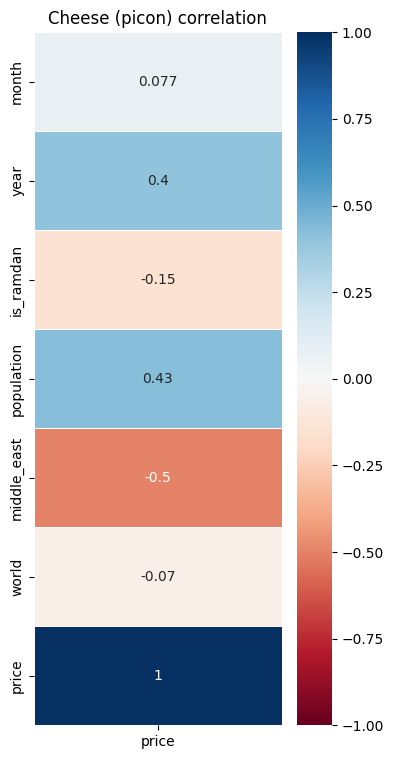

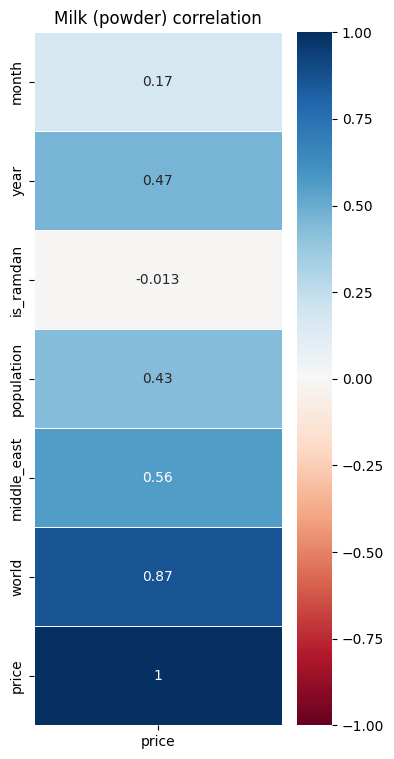

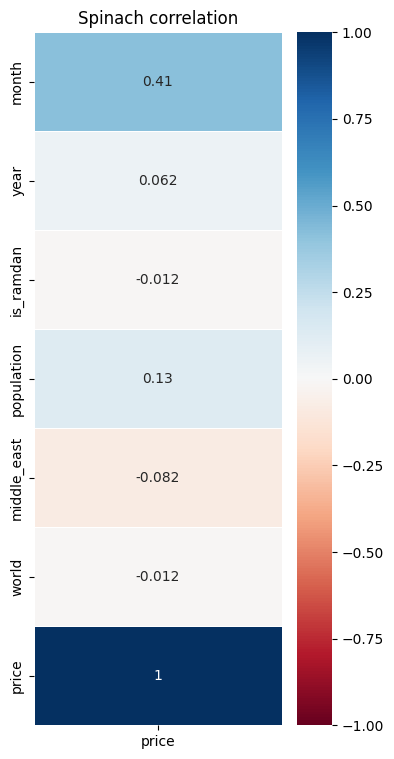

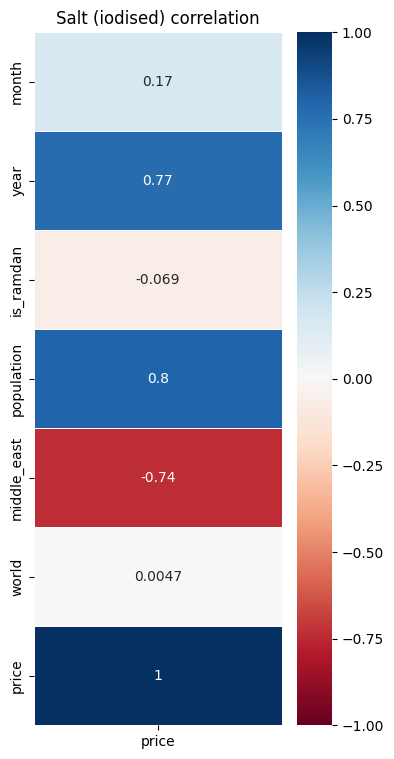

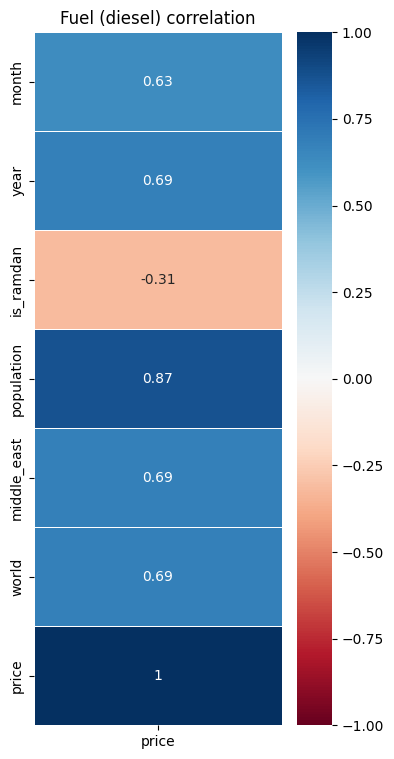

In [459]:
for i in df['commodity'].unique():
 g=df.loc[df['commodity'] == i]
 corr = g.corr()
 corr_with_target = corr['price']
 plt.figure(figsize = (4,9))
 plt.title(i +' correlation')
 sns.heatmap(corr_with_target.to_frame(), cmap="RdBu", annot=True ,linewidths=.5, vmin=-1, vmax=1)
#  plt.savefig(i +' correlation.png', bbox_inches = 'tight')
 plt.show()


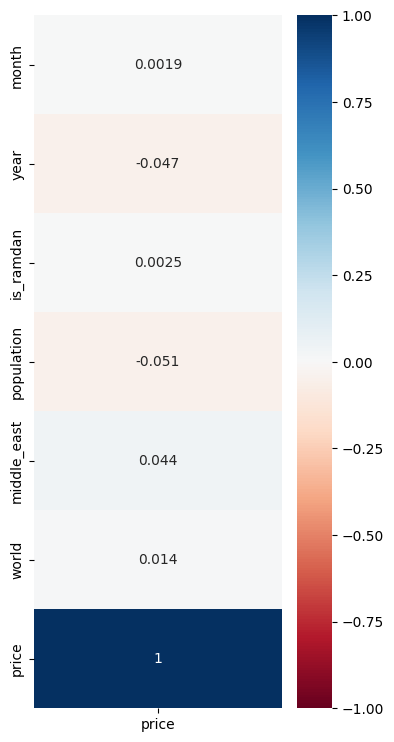

In [460]:
corrmat = df.corr()
top_corr = corrmat['price']
plt.figure(figsize = (4,9))
# It is better to draw a heatmap 
g = sns.heatmap(top_corr.to_frame(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

# orderly encoded 

In [461]:
categorys = df['category'].unique().tolist()
commoditys = df['commodity'].unique().tolist()
cat_com = {}
for com in commoditys:
    # print(df[df['commodity'] == com].iloc[0]['category'])
    cat = df[df['commodity'] == com].iloc[0]['category']
    if cat in cat_com:
        cat_com[cat].append(com)
    else:
        cat_com[cat] = []
        cat_com[cat].append(com)
df['category'] = [categorys.index(cat) for cat in df['category']]
df['commodity'] = [commoditys.index(com) for com in df['commodity']]

In [462]:
df2023['category'] = [categorys.index(cat) for cat in df2023['category']]
df2023['commodity'] = [commoditys.index(com) for com in df2023['commodity']]

# spliting the data into train and test

## prep 

In [463]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [464]:

testX = df2023.iloc[:, :-1].values
testy = df2023.iloc[:, -1].values

## spliting

In [465]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,shuffle=False)

# model testing 

## xgboost

In [466]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# make predictions on the test data
y_pred = xgb_model.predict(X_test)

# calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.24
Mean Absolute Error (MAE): 0.14
R-squared (R²): 0.99


### testing on 2023 data 

In [467]:
# make predictions on the test data
y_pred = xgb_model.predict(testX)
# calculate the evaluation metrics
mse = mean_squared_error(testy, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(testy, y_pred)
r2 = r2_score(testy, y_pred)

# print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.08
Root Mean Squared Error (RMSE): 0.29
Mean Absolute Error (MAE): 0.18
R-squared (R²): 0.99


## DecisionTreeRegressor

In [468]:
from sklearn.tree import DecisionTreeRegressor

In [469]:
DT_regressor = DecisionTreeRegressor(random_state = 42,criterion= 'poisson', max_depth= 9, max_features= 'auto',
 max_leaf_nodes= None, min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')
DT_regressor.fit(X_train, y_train)

# make predictions on the test data
y_pred=DT_regressor.predict(X_test)

# calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the results
print(f"Mean Squared Error (MSE)= {mse:.2f}")
print(f"Root Mean Squared Error (RMSE)= {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE)= 0.06
Root Mean Squared Error (RMSE)= 0.24
Mean Absolute Error (MAE): 0.14
R-squared (R²): 0.99


In [470]:
DT_regressor.score(X_train, y_train)

0.9984568149226909

### grid search

In [471]:
from sklearn.model_selection import GridSearchCV


In [472]:
# estimated time 18 hr

# param_grid = {
#     'max_depth': [3, 4, 5,6,7,8,9,10,11],
#     'min_samples_split': [2, 4, 6,7,8,9,10,11],
#     'min_samples_leaf': [1, 2, 3,4,5,6,7,8,9,10],
#     'max_features': [None,'auto', 'sqrt', 'log2'],
#     'criterion': ['poisson', 'absolute_error', 'squared_error', 'friedman_mse'],
#     'splitter': ['best', 'random'],
#     'max_leaf_nodes':[1, 2, 3,4,5,6,7,8,9,10,None]
# }
# dt = DecisionTreeRegressor()

# grid_search = GridSearchCV(dt, param_grid=param_grid, cv=10)
# grid_search.fit(X, y)

In [473]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best hyperparameters: ", grid_search.best_score_)
# print("Best hyperparameters: ", grid_search.best_estimator_)

'''
Best hyperparameters:  {'criterion': 'poisson', 'max_depth': 9, 'max_features': 'auto',
 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best hyperparameters:  0.9929137823769661
Best hyperparameters:  DecisionTreeRegressor(criterion='poisson', max_depth=9, max_features='auto')'''

"\nBest hyperparameters:  {'criterion': 'poisson', 'max_depth': 9, 'max_features': 'auto',\n 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}\nBest hyperparameters:  0.9929137823769661\nBest hyperparameters:  DecisionTreeRegressor(criterion='poisson', max_depth=9, max_features='auto')"

### testing on 2023 data 

In [474]:
# make predictions on the test data
y_pred = DT_regressor.predict(testX)
# calculate the evaluation metrics
mse = mean_squared_error(testy, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(testy, y_pred)
r2 = r2_score(testy, y_pred)

# print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.10
Root Mean Squared Error (RMSE): 0.32
Mean Absolute Error (MAE): 0.21
R-squared (R²): 0.98


## RandomForestRegressor

In [475]:
from sklearn.ensemble import RandomForestRegressor
RF_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
RF_regressor.fit(X_train, y_train)
y_pred=RF_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.23
Mean Absolute Error (MAE): 0.13
R-squared (R²): 0.99


### testing on 2023 data 

In [476]:
# make predictions on the test data
y_pred = RF_regressor.predict(testX)
# calculate the evaluation metrics
mse = mean_squared_error(testy, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(testy, y_pred)
r2 = r2_score(testy, y_pred)

# print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.09
Root Mean Squared Error (RMSE): 0.30
Mean Absolute Error (MAE): 0.19
R-squared (R²): 0.98


## arima 

In [477]:
# import statsmodels.api.sm.tsa as ARIMA

# model = ARIMA(df[''], order=(5,1,0))

# results = model.fit()

# fig, ax = plt.subplots(figsize=(12,6))
# ax = df.plot(ax=ax)
# results.plot_predict('2023-01', '2024-01', ax=ax, plot_insample=False)
# plt.show()


## PolynomialFeatures

In [478]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 4)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)


lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train_poly, y_train)

y_pred=lin_reg_2.predict(X_test_poly) 

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the results
print(f"Mean Squared Error (MSE)= {mse:.2f}")
print(f"Root Mean Squared Error (RMSE)= {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE)= 5765368.72
Root Mean Squared Error (RMSE)= 2401.12
Mean Absolute Error (MAE): 1475.67
R-squared (R²): -1005883.70


## svm

In [479]:
from sklearn import svm
model=svm.SVR(C=0.1,gamma=0.5).fit(X_train,y_train)
y_pred=model.predict(X_test) 

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the results
print(f"Mean Squared Error (MSE)= {mse:.2f}")
print(f"Root Mean Squared Error (RMSE)= {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE)= 6.48
Root Mean Squared Error (RMSE)= 2.54
Mean Absolute Error (MAE): 1.46
R-squared (R²): -0.13


## linear reg

In [480]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred=regressor.predict(X_test) 

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the results
print(f"Mean Squared Error (MSE)= {mse:.2f}")
print(f"Root Mean Squared Error (RMSE)= {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE)= 5.94
Root Mean Squared Error (RMSE)= 2.44
Mean Absolute Error (MAE): 2.03
R-squared (R²): -0.04


## Ridge

In [481]:
from sklearn.linear_model import Ridge 
model=Ridge()
model.fit(X_train,y_train) 

y_pred=model.predict(X_test) 

# calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the results
print(f"Mean Squared Error (MSE)= {mse:.2f}")
print(f"Root Mean Squared Error (RMSE)= {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE)= 5.94
Root Mean Squared Error (RMSE)= 2.44
Mean Absolute Error (MAE): 2.03
R-squared (R²): -0.04


## Lasso

In [482]:
from sklearn.linear_model import Lasso 

model=Lasso()
model.fit(X_train,y_train) 

y_pred=model.predict(X_test) 

# calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the results
print(f"Mean Squared Error (MSE)= {mse:.2f}")
print(f"Root Mean Squared Error (RMSE)= {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE)= 5.31
Root Mean Squared Error (RMSE)= 2.30
Mean Absolute Error (MAE): 1.66
R-squared (R²): 0.07


# exporting the model

In [483]:
# import pickle
# import json
# with open('dep/xgboost model.pkl', 'wb') as file:
#      pickle.dump(xgb_model, file)
# with open('dep/categorys_encoded.pkl', 'wb') as lst:
#     pickle.dump(categorys, lst)
# with open('dep/commoditys_encoded.pkl', 'wb') as lst:
#     pickle.dump(commoditys, lst)
# with open('dep/cat_com.json', 'w') as di:
#     json.dump(cat_com, di)

#
 ---

# test predicting 2023 

In [484]:
test_df=pd.read_excel('test.xlsx')

In [485]:
pred_price=xgb_model.predict(test_df)
# pred_price=DT_regressor.predict(test_df)
# pred_price=RF_regressor.predict(test_df)


In [486]:
test_df['price']=pred_price

In [487]:
com=11
data1=df[df['commodity']==com]
data2=test_df[test_df['commodity']==com]

data1['date']=pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))
data2['date']=pd.to_datetime(test_df['year'].astype(str) + '-' + test_df['month'].astype(str))

In [488]:
# data=pd.concat([data1,data2],axis=0)
# data['date']=pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))
# data.drop(['category','commodity','is_ramdan','population','middle_east','world','year','month'],axis=1,inplace=True)
# data.sort_values('date',inplace=True)

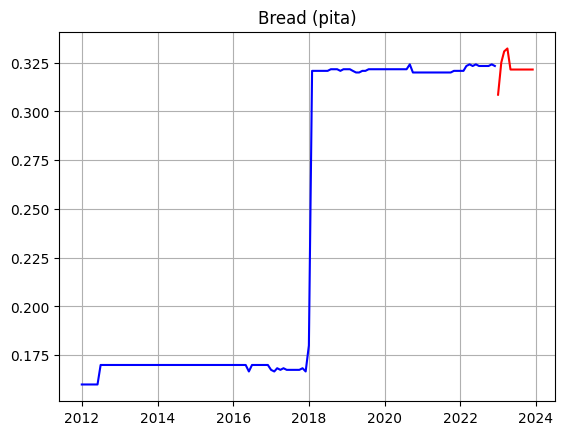

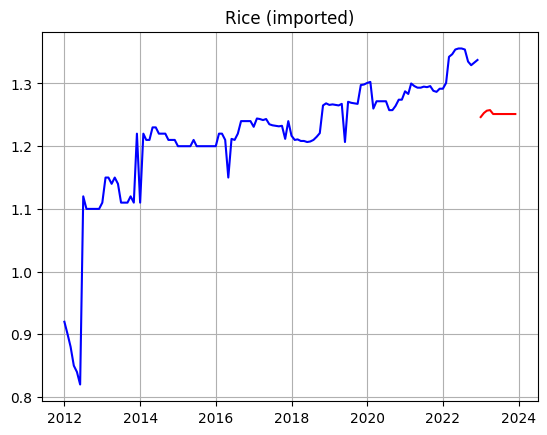

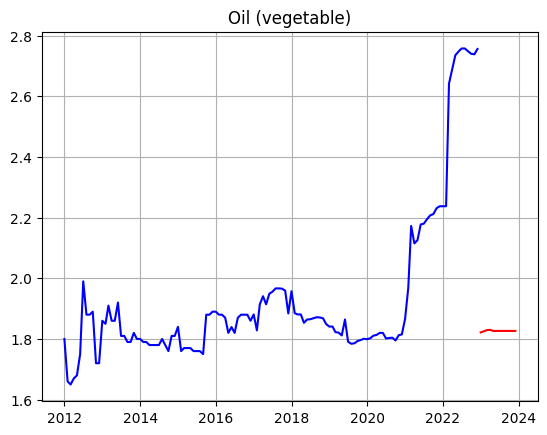

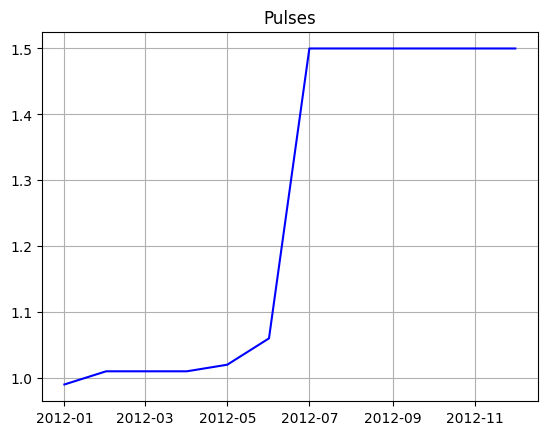

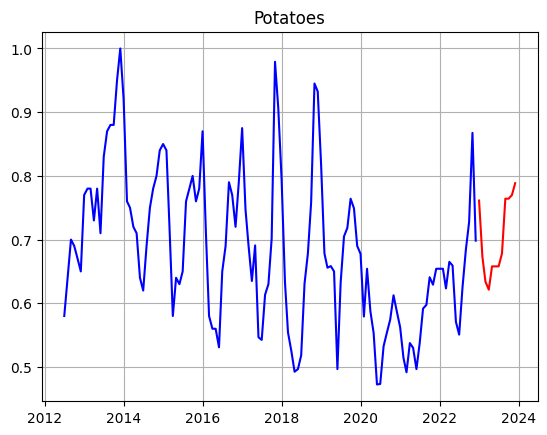

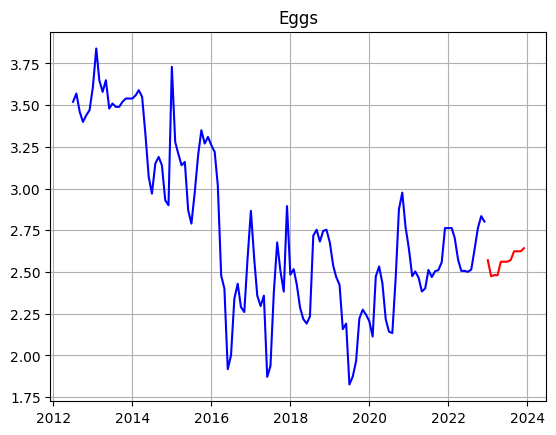

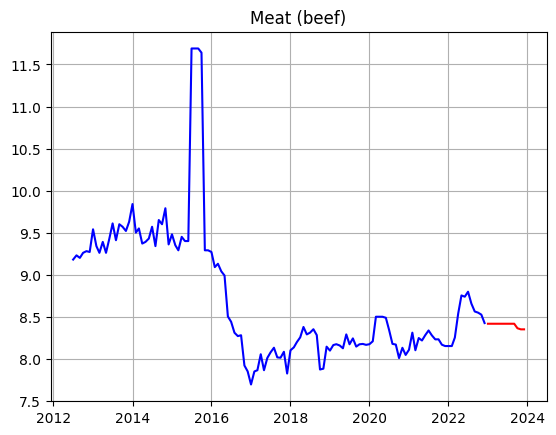

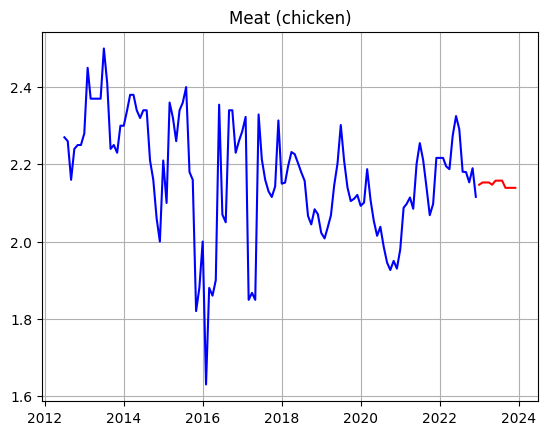

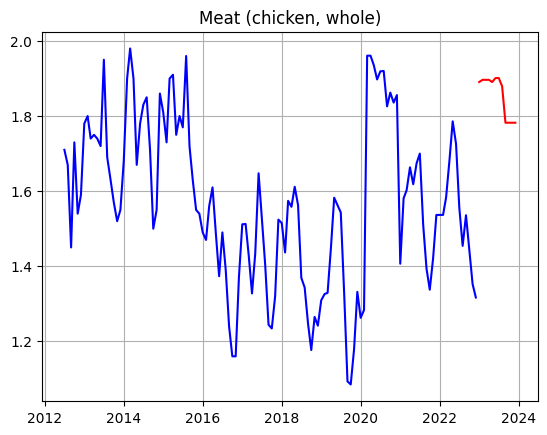

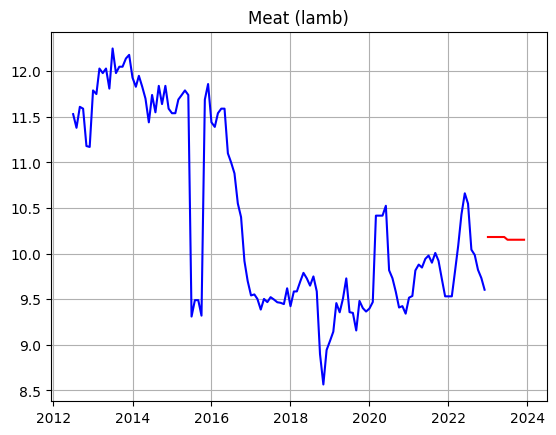

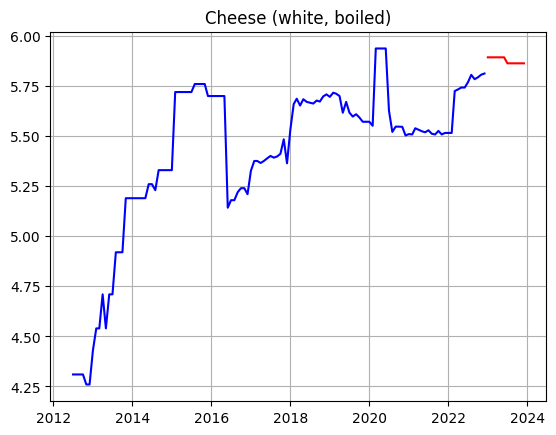

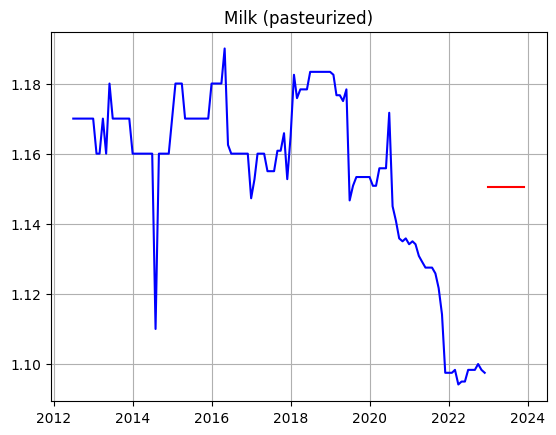

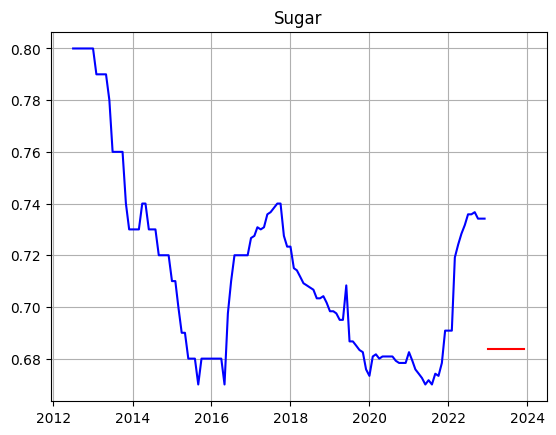

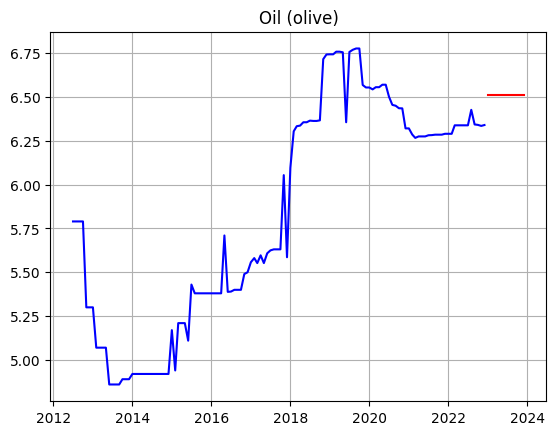

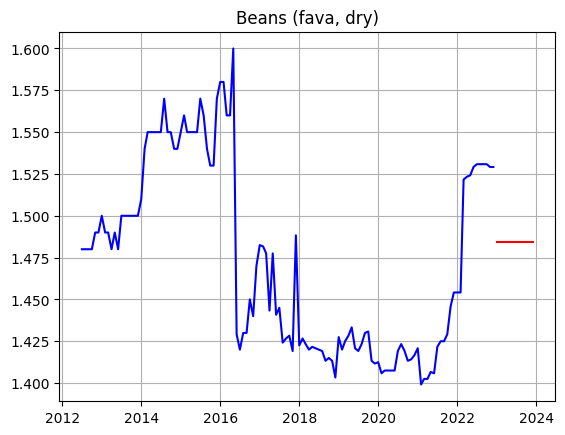

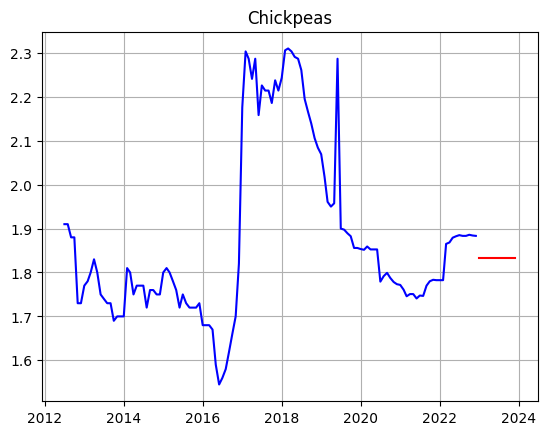

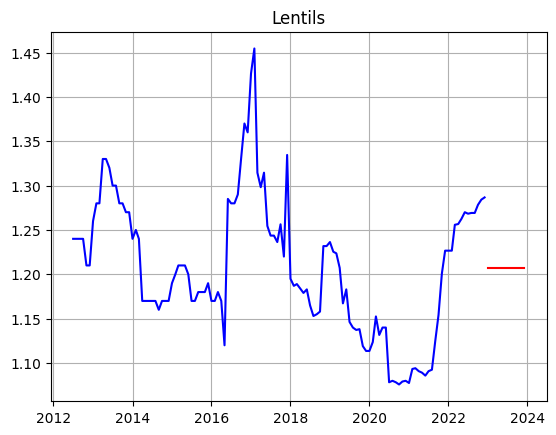

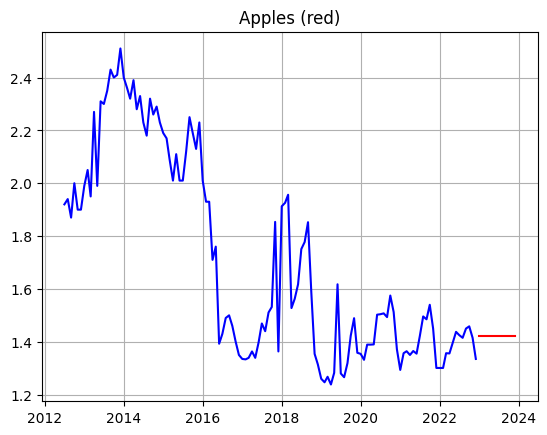

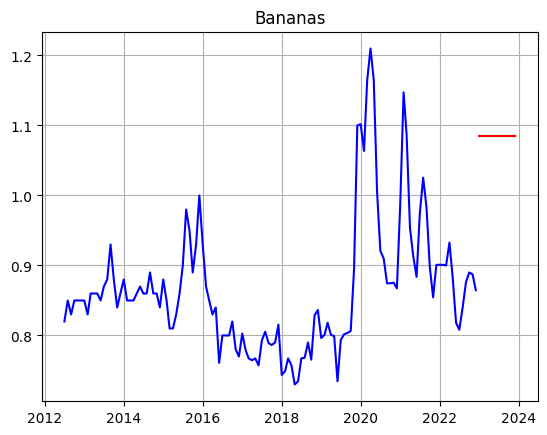

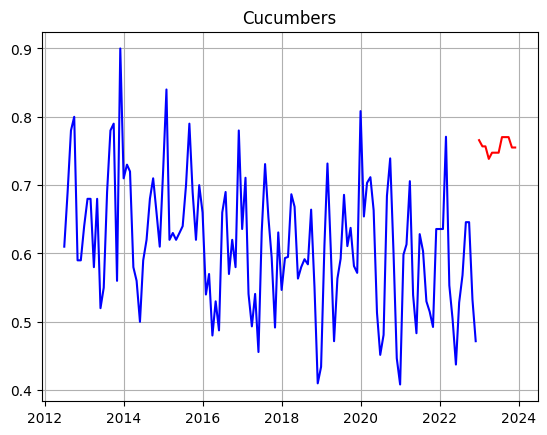

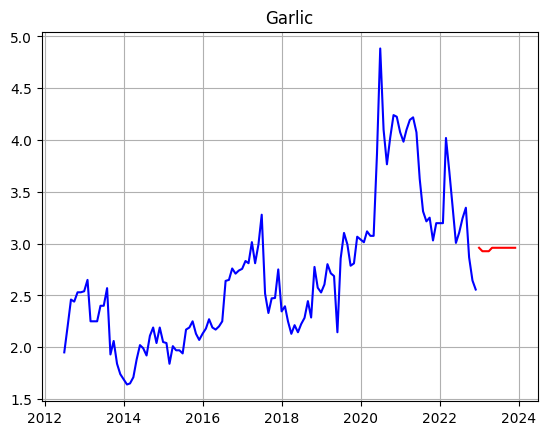

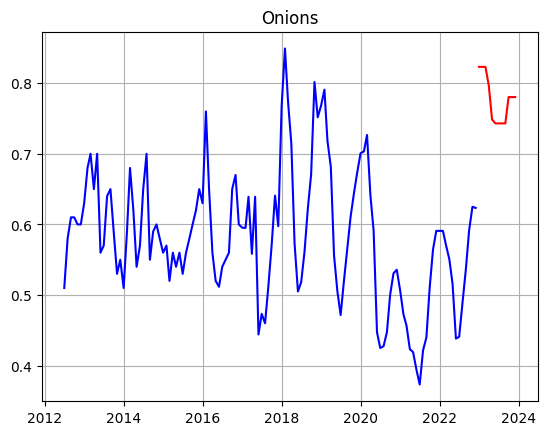

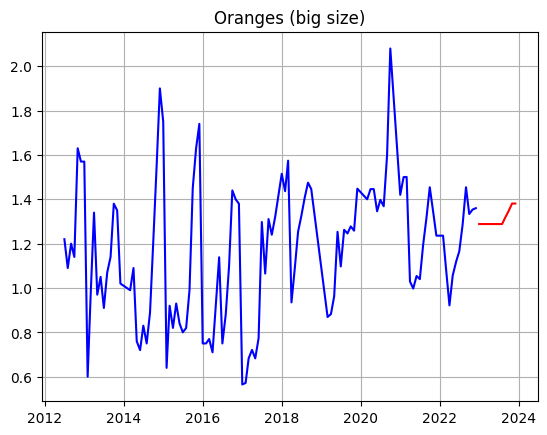

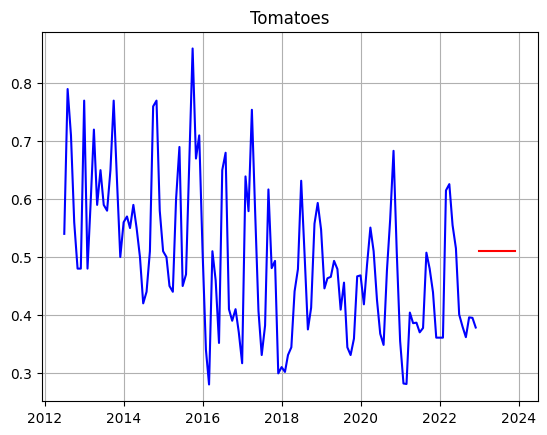

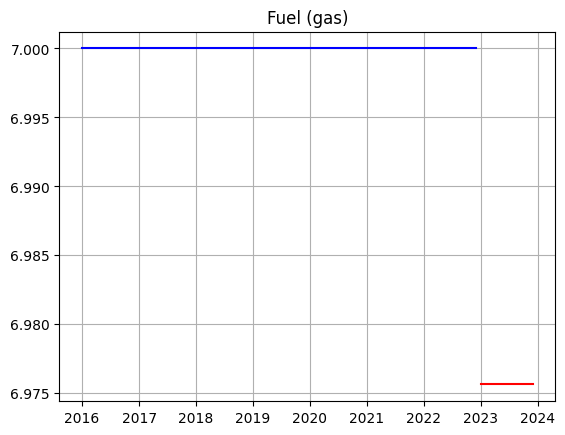

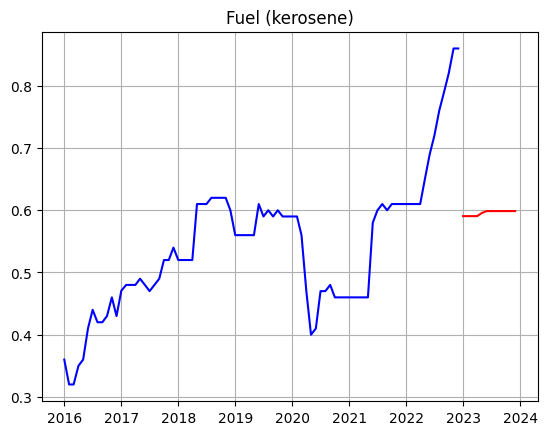

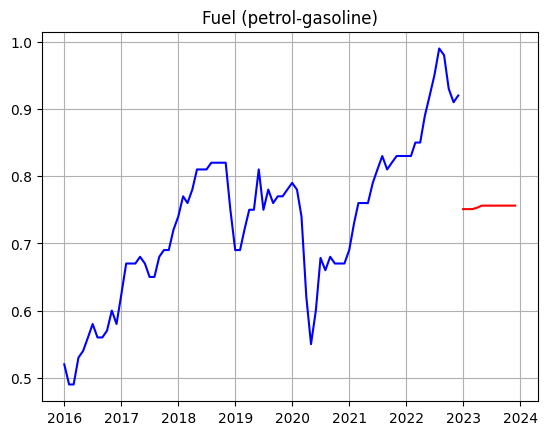

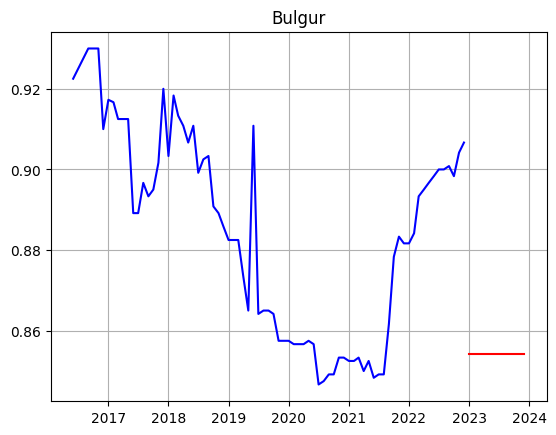

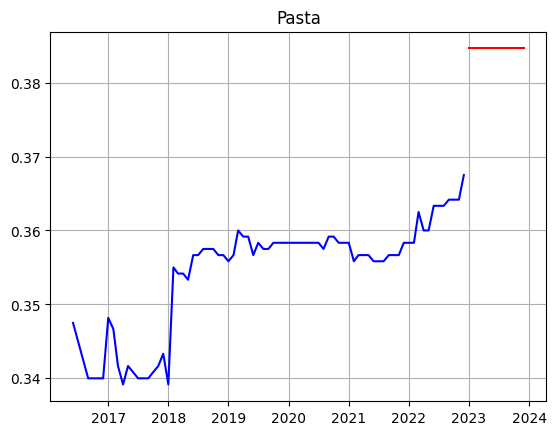

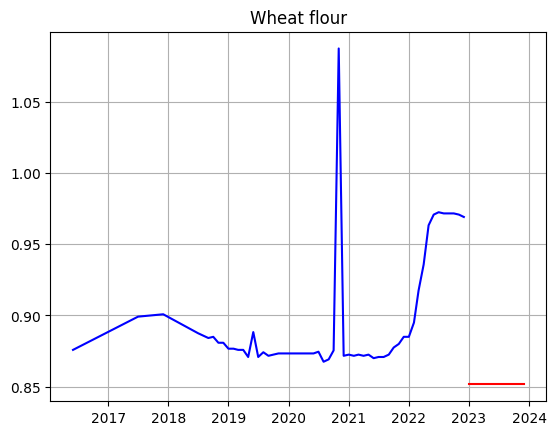

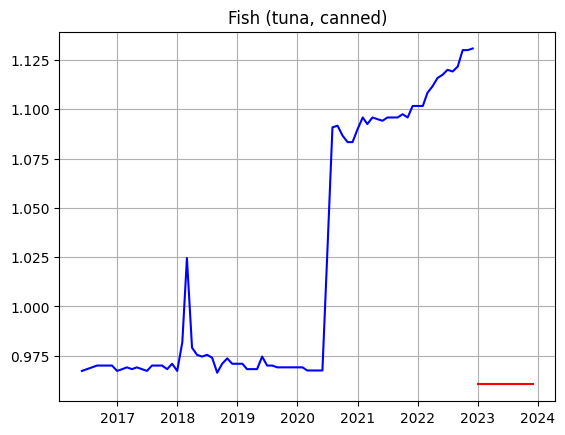

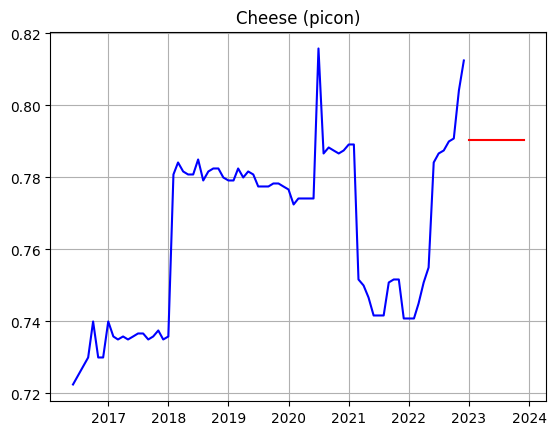

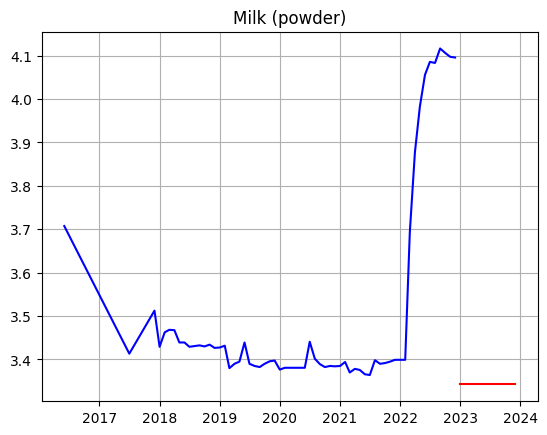

In [489]:
for i in range(33):
    com=i
    data1=df[df['commodity']==com]
    data2=test_df[test_df['commodity']==com]
    data1['date']=pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))
    data2['date']=pd.to_datetime(test_df['year'].astype(str) + '-' + test_df['month'].astype(str))
    plt.plot(data1['date'],data1['price'],c='b')
    plt.plot(data2['date'],data2['price'],c='r')
    plt.title(commoditys[i])
    plt.grid()
    # plt.savefig(f'img/{commoditys[i]}.png')
    plt.show()